<a href="https://colab.research.google.com/github/haewon22/DFS_BFS/blob/main/%5B%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98HW03%5D_DFS_BFS_20221377.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from textwrap import fill
from IPython.display import Image
from graphviz import Digraph, Graph
import math
INF = math.inf
GRAY = 'gray86'
WHITE = 'white'
BLACK = 'gray47'

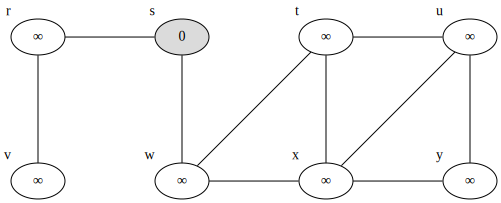

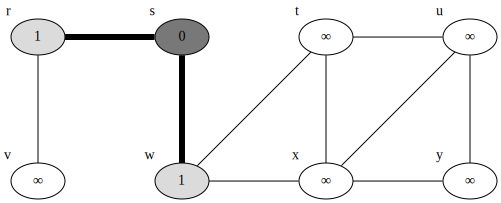

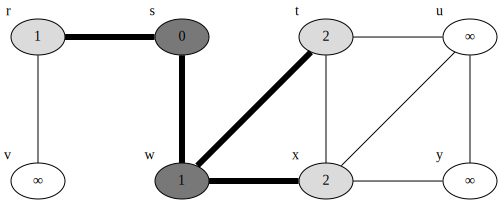

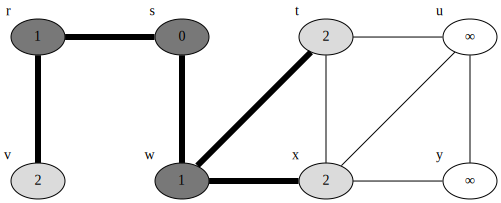

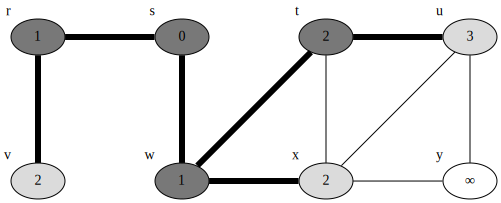

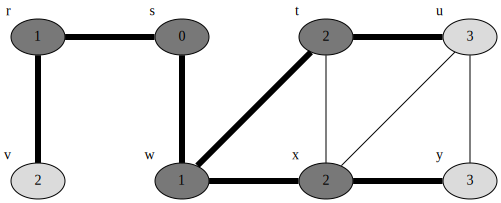

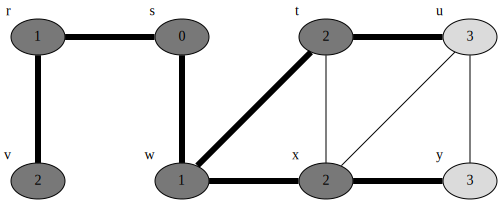

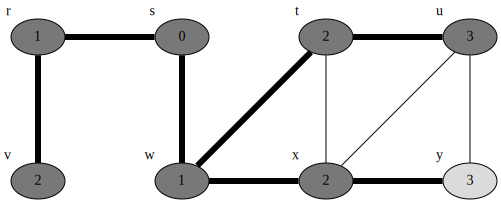

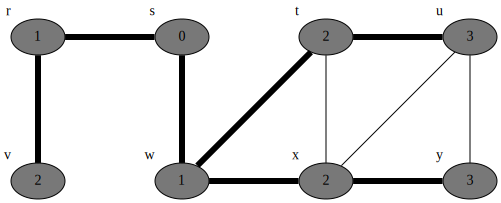

In [ ]:
edge = {'r': ['s', 'v'], 's': ['w'], 'w':['t', 'x'], 't':['u', 'x'], 'x':['y'], 'u':['x', 'y']}
node = {'r': ['node r', '0,0!'], 's': ['node s', '2,0!'], 't': ['node t', '4,0!'], 'u': ['node u', '6,0!'], 'v': ['node v', '0,-2!'], 'w': ['node x', '2,-2!'], 'x': ['node x', '4,-2!'], 'y': ['node y', '6,-2!']}
labels = {'r': '∞', 's': '∞', 'w':'∞', 't':'∞', 'x':'∞', 'u':'∞'}  # level?
colors = {}       # node color
dis = {}          # discovery time
pi = {}           # parent π
edgeWidth = []    # tree edge with bold style

def _Adj(nodeN):   # return Adj of nodeN
  adj = []
  if nodeN in edge.keys():
    for a in edge[nodeN]:
      adj.append(a)
  for key in edge.keys():
    for val in edge[key]:
      if nodeN in val:
        adj.append(key)
  return adj

def draw():
  dot = Graph(engine='neato')
  checkDup = []       # u-v edge와 v-u edge가 동시에 그려지는 것 방지용
  penw = '1'          # default edge width
  # draw node
  for nodeN in node.keys():
    dot.node(name=nodeN, label=labels[nodeN], pos=node[nodeN][1], xlabel = nodeN, fillcolor=colors.get(nodeN, 'white'), style="filled", color='black')
  # draw edge: u->v
  for _from in node.keys():  # u
    for _to in _Adj(_from):  # v
      # Check if the edge is not already drawn
      if (_from, _to) not in checkDup and (_to, _from) not in checkDup:
        if (_from, _to)in edgeWidth or (_to, _from) in edgeWidth:
            dot.edge(_from, _to, penwidth='6')
        else:
            dot.edge(_from, _to, penwidth='1')
        checkDup.append((_from, _to))

  display(dot)

#BFS
def BFS(s):
  queue = []
  V = list(node.keys())             # list of node name
  V.remove(s)                       # G.V-{s}
  for u in V:                       # for each vertex u in G.V-{s}
    colors.update({u: WHITE})       # u.color = WHITE
    dis.update({u: INF})            # u.d = ∞
    labels.update({u: '∞'})        # node label: [∞]
    pi.update({u:None})             # u.π = NIL
  colors.update({s: GRAY})          # s.color = GRAY
  dis.update({s: 0})                # s.d = 0
  labels.update({s: '0'})           # node label: [0]
  pi.update({s:None})               # s.π = NIL
  queue.clear()                     # Q = ∅
  queue.append(s)                   # Enqueue(Q, s)
  draw()

  while queue:                      # while Q != ∅
    u = queue.pop(0)                # u = Dequeue(Q)
    for v in _Adj(u):               # for each vertex in G.Adj[u]
      if colors[v] == WHITE:        # if v.color == WHITE
        colors.update({v:GRAY})     # v.color = GRAY
        t = dis[u] + 1
        dis.update({v:t})           # v.d = u.d + 1
        labels.update({v: str(t)})  # node label: [0], [1],..
        pi.update({v:u})            # v.π = u
        queue.append(v)             # Enqueue(Q, v)
        edgeWidth.append((u, v))    # tree edge
    colors.update({u: BLACK})       # u.color = BLACK
    draw()

BFS('s')

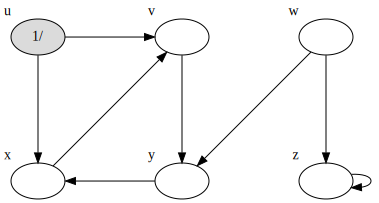

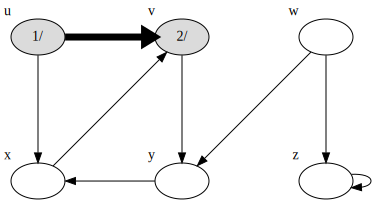

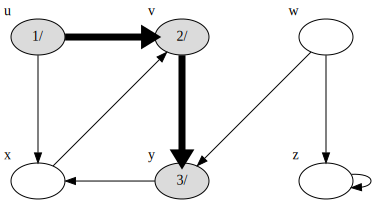

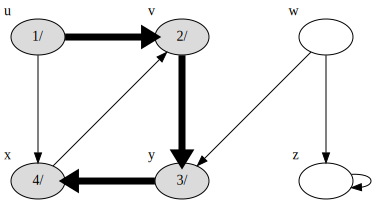

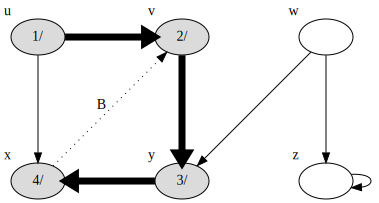

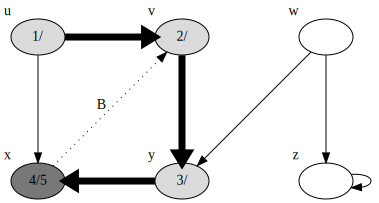

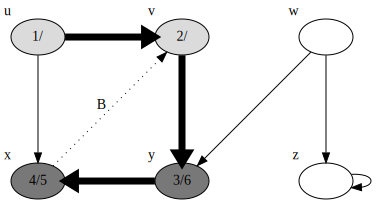

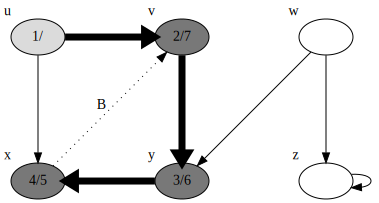

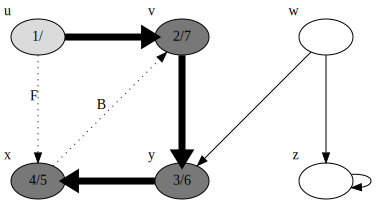

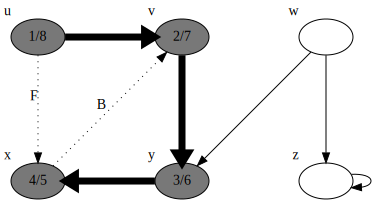

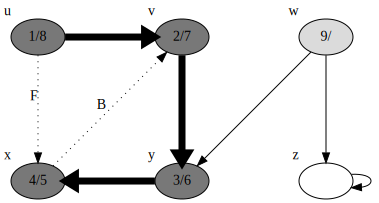

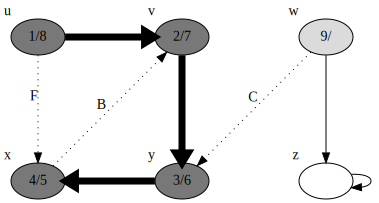

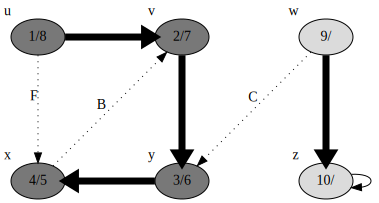

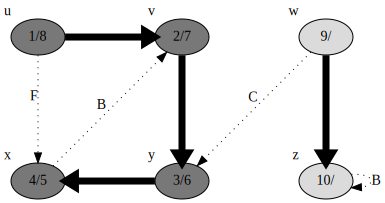

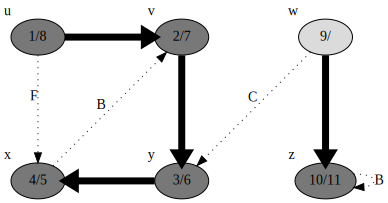

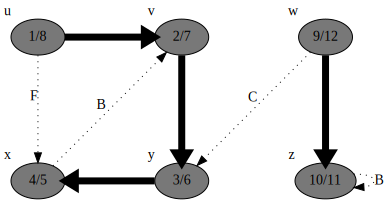

In [ ]:
edge = {'u': ['v', 'x'], 'v':['y'], 'y':['x'], 'x':['v'], 'w': ['y', 'z'], 'z': ['z']}
node = {'u':['node u', '0,0!'], 'v':['node v', '2,0!'], 'w': ['node w', '4,0!'], 'x':['node x', '0,-2!'], 'y':['node y', '2,-2!'], 'z':['node z', '4,-2!']}
# ↓Nodes for testing when the starting point is w 공지에 올려주신 시작점을 달리해서 cross edge가 아니게 되는 경우..
# node = {'w': ['node w', '4,0!'],'z':['node z', '4,-2!'],'u':['node u', '0,0!'], 'v':['node v', '2,0!'],  'x':['node x', '0,-2!'], 'y':['node y', '2,-2!']}
labels = {}       # node label
elabels = {}      # edge label: (d/f)
colors = {}       # node color
dis = {}          # discovery time
fin = {}          # finish time
pi = {}           # parent
edgeWidth = []   # tree edge with bold style

# for performing edge classification
edgeC = {'back': [], 'forward': [], 'cross': [], 'tree': []}  # {tree:['uv', 'vy', ..], back: ,..}

def _AdjDFS(nodeN):   # return Adj of nodeN
  if nodeN in edge.keys():
    return edge[nodeN]

def _elabel(edgeE):  # edge label('B','F','C') + edge style(dotted or default)
  if edgeC['back'] is not None and edgeE in edgeC['back']:
    result = 'Bdotted'
  elif edgeC['forward'] is not None and edgeE in edgeC['forward']:
    result = 'Fdotted'
  elif edgeC['cross'] is not None and edgeE in edgeC['cross']:
    result = 'Cdotted'
  else:
    result = '  '  # no edge label and default edge style
  return result

def _label(nodeN):  # 'd/f' label in node
  if nodeN in dis.keys():
    d = dis[nodeN]
  else: d = ' '
  if nodeN in fin.keys():
    f = fin[nodeN]
  else: f = ' '
  if nodeN not in dis.keys() and nodeN not in fin.keys():
    string = ' '
  else:
    string =  str(d)+'/'+str(f)
  labels.update({nodeN: string})
  return

def draw():
  dot = Digraph(engine='neato')
  penw = '1'  # default edge width
  #draw node
  for nodeN in node.keys():
    _label(nodeN)
    dot.node(name=nodeN, label=labels[nodeN], pos=node[nodeN][1], xlabel = nodeN, fillcolor=colors.get(nodeN, 'white'), style="filled", color='black')
  #draw edge: u->v
  for _from in node.keys():        # u
    for _to in _AdjDFS(_from):     # v
      sty = _elabel(_from+_to)     # ex) 'Bdotted' or ' '
      if (_from, _to)in edgeWidth:
        dot.edge(_from, _to, penwidth='7', label=sty[0], style=sty[1:])
      else:
        dot.edge(_from, _to, penwidth='1', label=sty[0], style=sty[1:])
  display(dot)

def edgeClassificationByTime(v, u):   # v->u
  if dis[u] < fin[u] < dis[v]:
    edgeC['cross'].append(v + u)
  elif dis[v] < dis[u] < fin[u] and v+u not in edgeC['tree']:
    edgeC['forward'].append(v + u)

def edgeClassificationByColor(v, u):  # v->u
  if u in _AdjDFS(v):
    if colors[u] == WHITE:
      edgeC['tree'].append(v + u)
    elif colors[u] == GRAY:
      edgeC['back'].append(v + u)
    elif colors[u] == BLACK:          # u가 BLACK인 경우에만 Time비교
      edgeClassificationByTime(v, u)

#DFS
time = 0
def DFS():
  V = list(node.keys())        # list of node name
  for u in V:                  # for each vertex u in G.V
    colors.update({u: WHITE})  # u.color = WHITE
    pi.update({u: None})       # i.pi = NIL
  global time
  time = 0                     # time = 0
  for u in V:                  # for each vertex u in G.V
    if colors[u] == WHITE:     # if u.color == WHITE
      pi.update({u:None})      # parent[u] = None
      DFS_Visit(u)

def DFS_Visit(u):
  if pi[u] is not None:
    edgeClassificationByColor(pi[u], u)
  global time
  time += 1                     # time += 1
  dis.update({u: time})         # u.d = time
  _label(u)                     # node label: [d/ ]
  colors.update({u:GRAY})       # u.color = GRAY
  draw()
  for v in _AdjDFS(u):          # for each vertex in G.dj[u]
    if colors[v] == WHITE:      # if v.color == WHITE
      edgeWidth.append((u, v))  # tree edge
      pi.update({v: u})         # parent[v] = u
      DFS_Visit(v)
    else:
      edgeClassificationByColor(u, v)
      draw()
  time+=1                       # time += 1
  fin.update({u: time})         # u.f = time
  _label(u)                     # node label: [d/f]
  colors.update({u: BLACK})     # u.color = BLACK
  draw()

DFS()